In [19]:
def read_mat_dataset(path_to_dataset:str = 'data.mat'):
    from scipy.io import loadmat
    mat_contents = loadmat(path_to_dataset)

    data_dict = {}
    data_dict['binary_masks'] = mat_contents['binary_masks']
    data_dict['normalvec_x'] = mat_contents['normalvec_x']
    data_dict['normalvec_y'] = mat_contents['normalvec_y']
    print(f"shape of [binary_masks] = {data_dict['binary_masks'].shape}")
    print(f"shape of [normalvec_x] = {data_dict['normalvec_x'].shape}")
    print(f"shape of [normalvec_y] = {data_dict['normalvec_y'].shape}")

    return data_dict

In [20]:
# Replace 'your_file.mat' with the path to your .mat file
dataset = read_mat_dataset(path_to_dataset= 'raw_dataset/freeform_nv_dataset.mat')

shape of [binary_masks] = (174883, 64, 64)
shape of [normalvec_x] = (174883, 64, 64)
shape of [normalvec_y] = (174883, 64, 64)


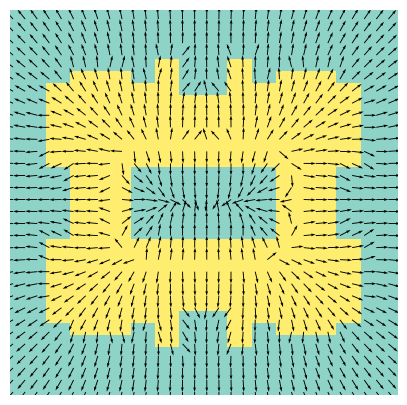

In [27]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5, 5))
marker_evrey = 2
nv_cmap = 'Set3'

sample_id = 6

Xn, Yn = np.meshgrid(np.arange(0, 64), np.arange(0, 64))

ax.pcolor(Xn, Yn, dataset['binary_masks'][sample_id, :, :].T, cmap=nv_cmap)

# The negative sign for gradient_y_downsampled is because in images, y axis is inverted
ax.quiver(Xn[::marker_evrey, ::marker_evrey], Yn[::marker_evrey, ::marker_evrey],
           -dataset['normalvec_y'][sample_id, ::marker_evrey, ::marker_evrey].T,
           -dataset['normalvec_x'][sample_id, ::marker_evrey, ::marker_evrey].T,
           angles='xy', scale_units='xy', scale=0.5, color='k')

ax.axis('off');